# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from package_Engels_Theo_Losseau_Baudouin import PID_RT, FF_RT, sim_tclabP, IMC_Tuning_SOPDT,Run_PID_Interactive

import package_DBR
from package_DBR import SelectPath_RT

# Simulation of PID controller in closed loop with FeedForward 
Both Processes are simulated using SOPDT models

In [2]:
help(PID_RT)

Help on function PID_RT in module package_Engels_Theo_Losseau_Baudouin:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, alpha=0.4, ManFF=False, FF=True, PVInit=0)
    The function "PID_RT" needs to be included in a "for or while loop".
    
    Inputs:
    :SP: SetPoint vector
    :PV: Precess Value vector
    :Man: Manual vector
    :MVMan: Manual value vector
    :MVFF: FeedForward vector (ouput of FF_RT)
    
    Parameters:
    :Kc: Controller gain
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :Ts: sampling period [s]
    :MVMin: Minimum value for MV (used for saturation and anti wind-up)
    :MVMax: Maxomum value for MV (used for saturation and anti wind-up)
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s]
    :FF: boolean value, activates or deactivates the feedforward, default value is true
    :ManFF: boolean value, activates the feedforward in manual mode, default value is fals

In [3]:



TSim = 3000
Ts = 1
N = int(TSim/Ts) + 1


#List of scenarios
# ------------------

# SPPath = {0: 70,2000:80,2600:65}
# ManPath = {0:1,500:0}
# MVManPath={0:50}
# DVPath = {0:50,1000:70,2000:60}
# ------------------

SPPath = {0: 70,2000:80}
ManPath = {0:1,1500:0}
MVManPath={0:50}
DVPath = {0:50,500:70,2000:60}
# ------------------

# SPPath = {0: 70,400:80,500:65,700:70,1000:80}
# ManPath = {0:1,100:0}
# MVManPath={0:50}
# DVPath = {0:50,1000:70,2000:60}
# ------------------

# PID parameters
Kp = 0.39
Kd = 0.63

Tlead1 = 47.84
Tlag1 = 245.36
Tlead2 = 17.39
Tlag2 = 3.13
Theta1 = 9.31
Theta2 = 0.56
gamma = 0.2
Kc,Ti,Td = IMC_Tuning_SOPDT(Kp,Tlead1,Tlead2,Theta1,gamma)
satMin = 0
satMax = 100
PVInit = 50

DV0=50
MV0 = 50
PV0 = 71.7 #obtained from Open_Loop_Experiment_on_MV_2022-02-28-10h14.txt (last value of PV before MV goes down)

[Text(0, 0.5, 'Value of DV')]

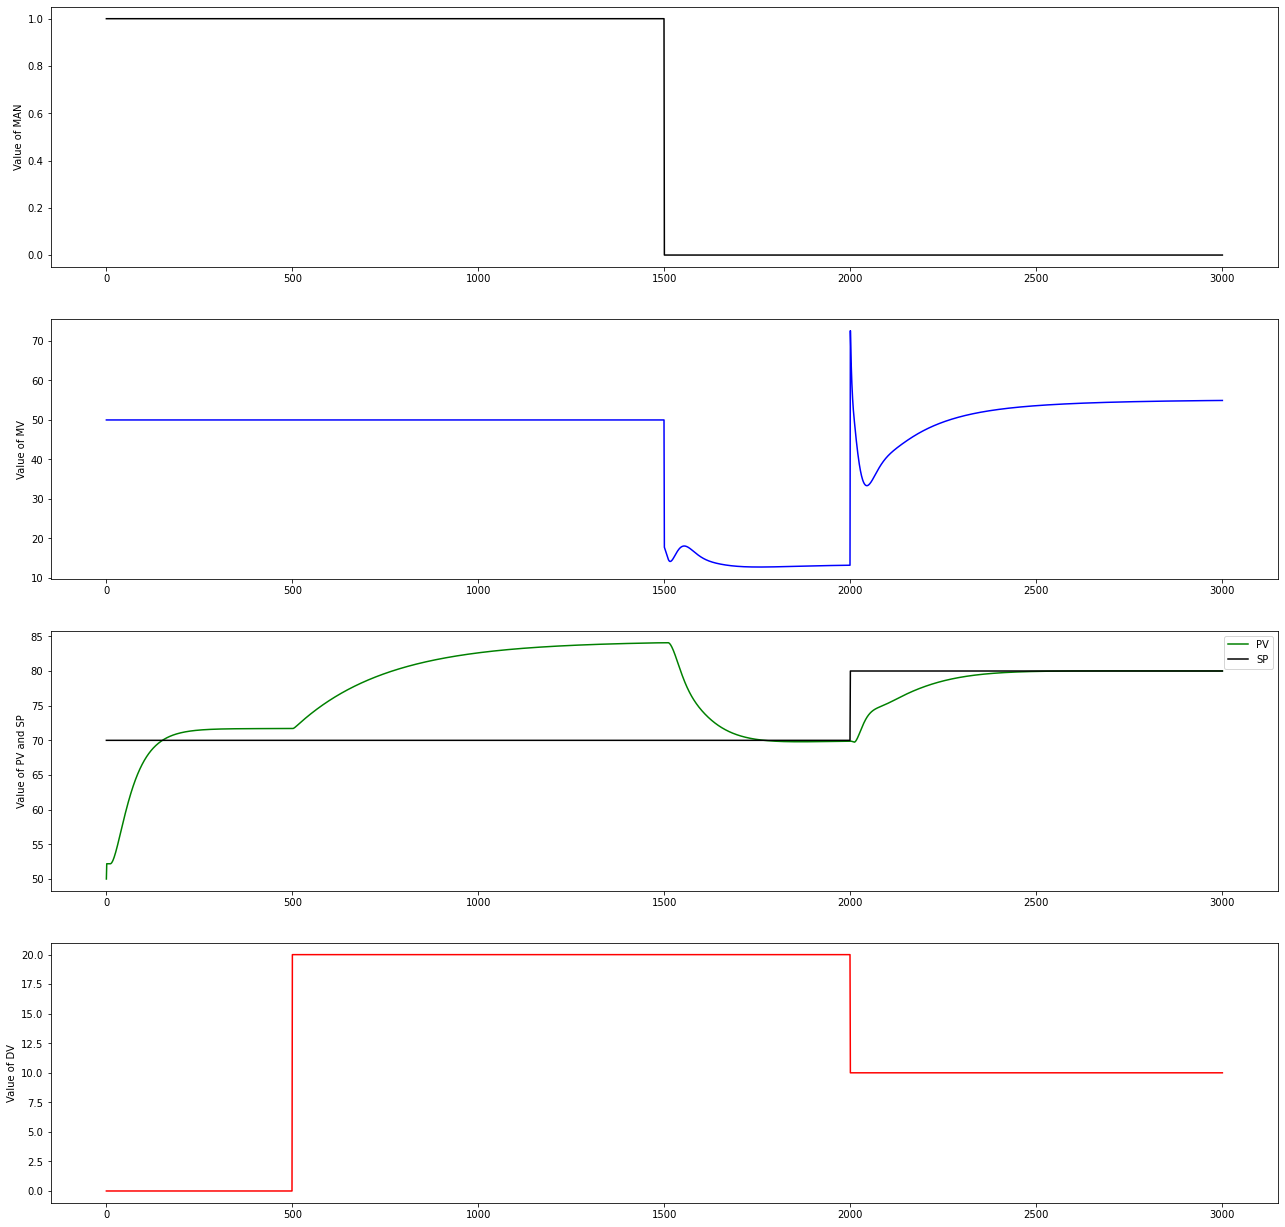

In [9]:
t = []
MV = []
MVMan = []
Man = []
PV = []
SP = []
MVP = []
MVI = []
MVD = []
E = []
Et = []
MVFF = []
ODV = []
OPV = []
DV = []
PVtemp1 = []
PVtemp2 = []
DVtemp1 = []
DVtemp2 = []

FFtemp1 = []
FFtemp2 = []

for i in range(0,N):
    t.append(i*Ts)
    
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(DVPath,t,DV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    
    DV[-1]-=DV0

    FF_RT(DV,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,FFtemp1,FFtemp2)
    PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E,FF = 1,PVInit = PVInit)
    sim_tclabP(MV,OPV,Ts,PVtemp1,PVtemp2,Kp,Tlead1,Tlead2,Theta1)
    sim_tclabP(DV,ODV,Ts,DVtemp1,DVtemp2,Kd,Tlag1,Tlag2,Theta2)
    PV.append(OPV[-1]+ODV[-1]+PV0-Kp*MV0)

fig,(ax,bx,cx,dx) = plt.subplots(4)
fig.set_figheight(22)
fig.set_figwidth(22)

ax.plot(t,Man,'black')
ax.set(ylabel='Value of MAN')

bx.plot(t,MV,'blue',label = "MV")
bx.set(ylabel='Value of MV')

cx.plot(t,PV[:-1],'green',label="PV")
cx.plot(t,SP,'black',label = "SP")
cx.set(ylabel='Value of PV and SP')
cx.legend(loc='best')


dx.plot(t,DV,'red')
dx.set(ylabel='Value of DV')

# Interactive Simulation

In [5]:
help(Run_PID_Interactive)

Help on function Run_PID_Interactive in module package_Engels_Theo_Losseau_Baudouin:

Run_PID_Interactive(gamma, alpha, Kp, Kd, Tlead1, Tlag1, Tlead2, Tlag2, Theta1, Theta2, DV0, MV0, PV0, ManFF, FF)
    The Run_PID_Interactive function needs to be used in a interactive function from ipywidgets.
    
    Parameters:
    :Kp: Process gain
    :Kd: Disturbance process gain
    :Tlead1: First lead time constant [s]
    :Tlag1: First lag time constant [s]
    :Tlead2: Second lead time constant [s]
    :Tlag2: Second lag time constant [s]
    :Theta1: Process delay
    :Theta2: Disturbance process delay
    :DV0: working point of DV
    :MV0: working point of MV
    :PV0: Value of PV after sabilisation at MV = MV0 and DV = DV0
     
    The function "Run_PID_Interactive" displays graphs of a PID controller calculated using the '



In [6]:

interactive(Run_PID_Interactive,FF = True,ManFF=True,gamma = widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.2),alpha = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.4),Kp = widgets.FloatSlider(min=0.1, max=10, step=0.01, value=0.39),Kd = widgets.FloatSlider(min=0.1, max=10, step=0.01, value=0.63),Tlead1 = widgets.FloatSlider(min=0.1, max=300, step=1, value=47.83),Tlag1= widgets.FloatSlider(min=0.1, max=300, step=1, value=245.36),Tlead2 = widgets.FloatSlider(min=0.1, max=300, step=1, value=17.39),Tlag2= widgets.FloatSlider(min=0.1, max=300, step=1, value=3.13),Theta1 = widgets.FloatSlider(min=0.1, max=20, step=1, value=9.31),Theta2 = widgets.FloatSlider(min=0.1, max=20, step=1, value=0.56),DV0 = widgets.FloatSlider(min=0, max=100, step=1, value=50),MV0 = widgets.FloatSlider(min=0, max=100, step=1, value=50),PV0 = widgets.FloatSlider(min=0, max=100, step=1, value=71.7))

interactive(children=(FloatSlider(value=0.2, description='gamma', max=1.0, min=0.1, step=0.01), FloatSlider(va…

In [7]:
t.append(i*Ts)

SelectPath_RT(SPPath,t,SP)
#SelectPath_RT(DVPath,t,DV)
SelectPath_RT(ManPath,t,Man)
SelectPath_RT(MVManPath,t,MVMan)

DV[-1]-=DV0

FF_RT(DV,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,FFtemp1,FFtemp2)
PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E,FF = 1,PVInit = PVInit)
PV.append(lab.T1+lab.T2+PV0-Kp*MV0)
lab.Q1(MV[-1])
#PV.append(OPV[-1]+ODV[-1]+PV0-Kp*MV0)
time.sleep(Ts)

l1.set_data(t,MV)
l2.set_data(t,MVP)
l3.set_data(t,MVI)
l4.set_data(t,MVD)

print(PV)
clear_output(wait=True)

ax1.set_xlim(0, t[-1]+1)

NameError: name 'lab' is not defined